In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Load and Inspect the Data

In [1]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
column_names = ['id', 'clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity', 'marginal_adhesion', 
                'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
data = pd.read_csv(url, header=None, names=column_names)

# Inspect the first few rows of the data
print(data.head())


        id  clump_thickness  cell_size_uniformity  cell_shape_uniformity  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   
3  1016277                6                     8                      8   
4  1017023                4                     1                      1   

   marginal_adhesion  single_epithelial_cell_size bare_nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   bland_chromatin  normal_nucleoli  mitoses  class  
0                3                1        1      2  
1                3                2        1

Data Cleaning

In [2]:
# Drop the 'id' column
data.drop('id', axis=1, inplace=True)

# Replace missing values denoted by '?' with NaN and then drop them
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

# Convert all columns to numeric
data = data.apply(pd.to_numeric)

# Map the target variable to 0 (benign) and 1 (malignant)
data['class'] = data['class'].map({2: 0, 4: 1})

# Verify the changes
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              683 non-null    int64
 1   cell_size_uniformity         683 non-null    int64
 2   cell_shape_uniformity        683 non-null    int64
 3   marginal_adhesion            683 non-null    int64
 4   single_epithelial_cell_size  683 non-null    int64
 5   bare_nuclei                  683 non-null    int64
 6   bland_chromatin              683 non-null    int64
 7   normal_nucleoli              683 non-null    int64
 8   mitoses                      683 non-null    int64
 9   class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB
None
       clump_thickness  cell_size_uniformity  cell_shape_uniformity  \
count       683.000000            683.000000             683.000000   
mean          4.442167              3.150

Exploratory Data Analysis (EDA)

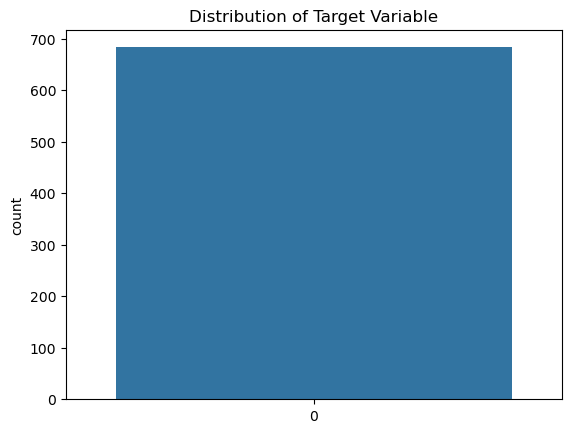

In [6]:
# Plot the distribution of the target variable
sns.countplot(data['class'])
plt.title('Distribution of Target Variable')
plt.show()

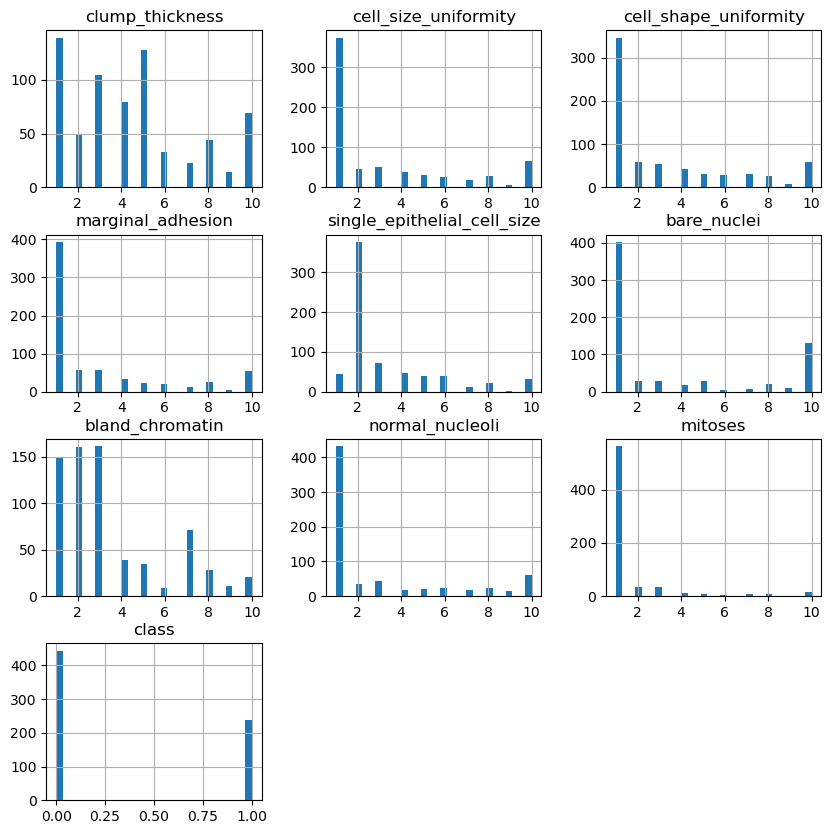

In [5]:
# Plot histograms of all features
data.hist(bins=30, figsize=(10, 10))
plt.show()

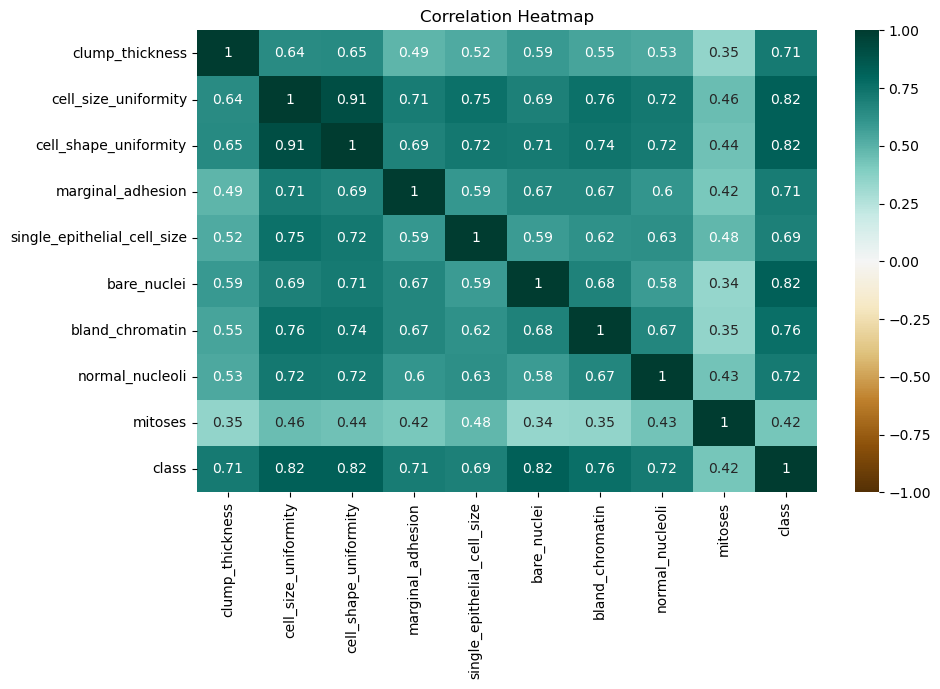

In [7]:
# Plot a correlation heatmap
corr = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\amjad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amjad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amjad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amjad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

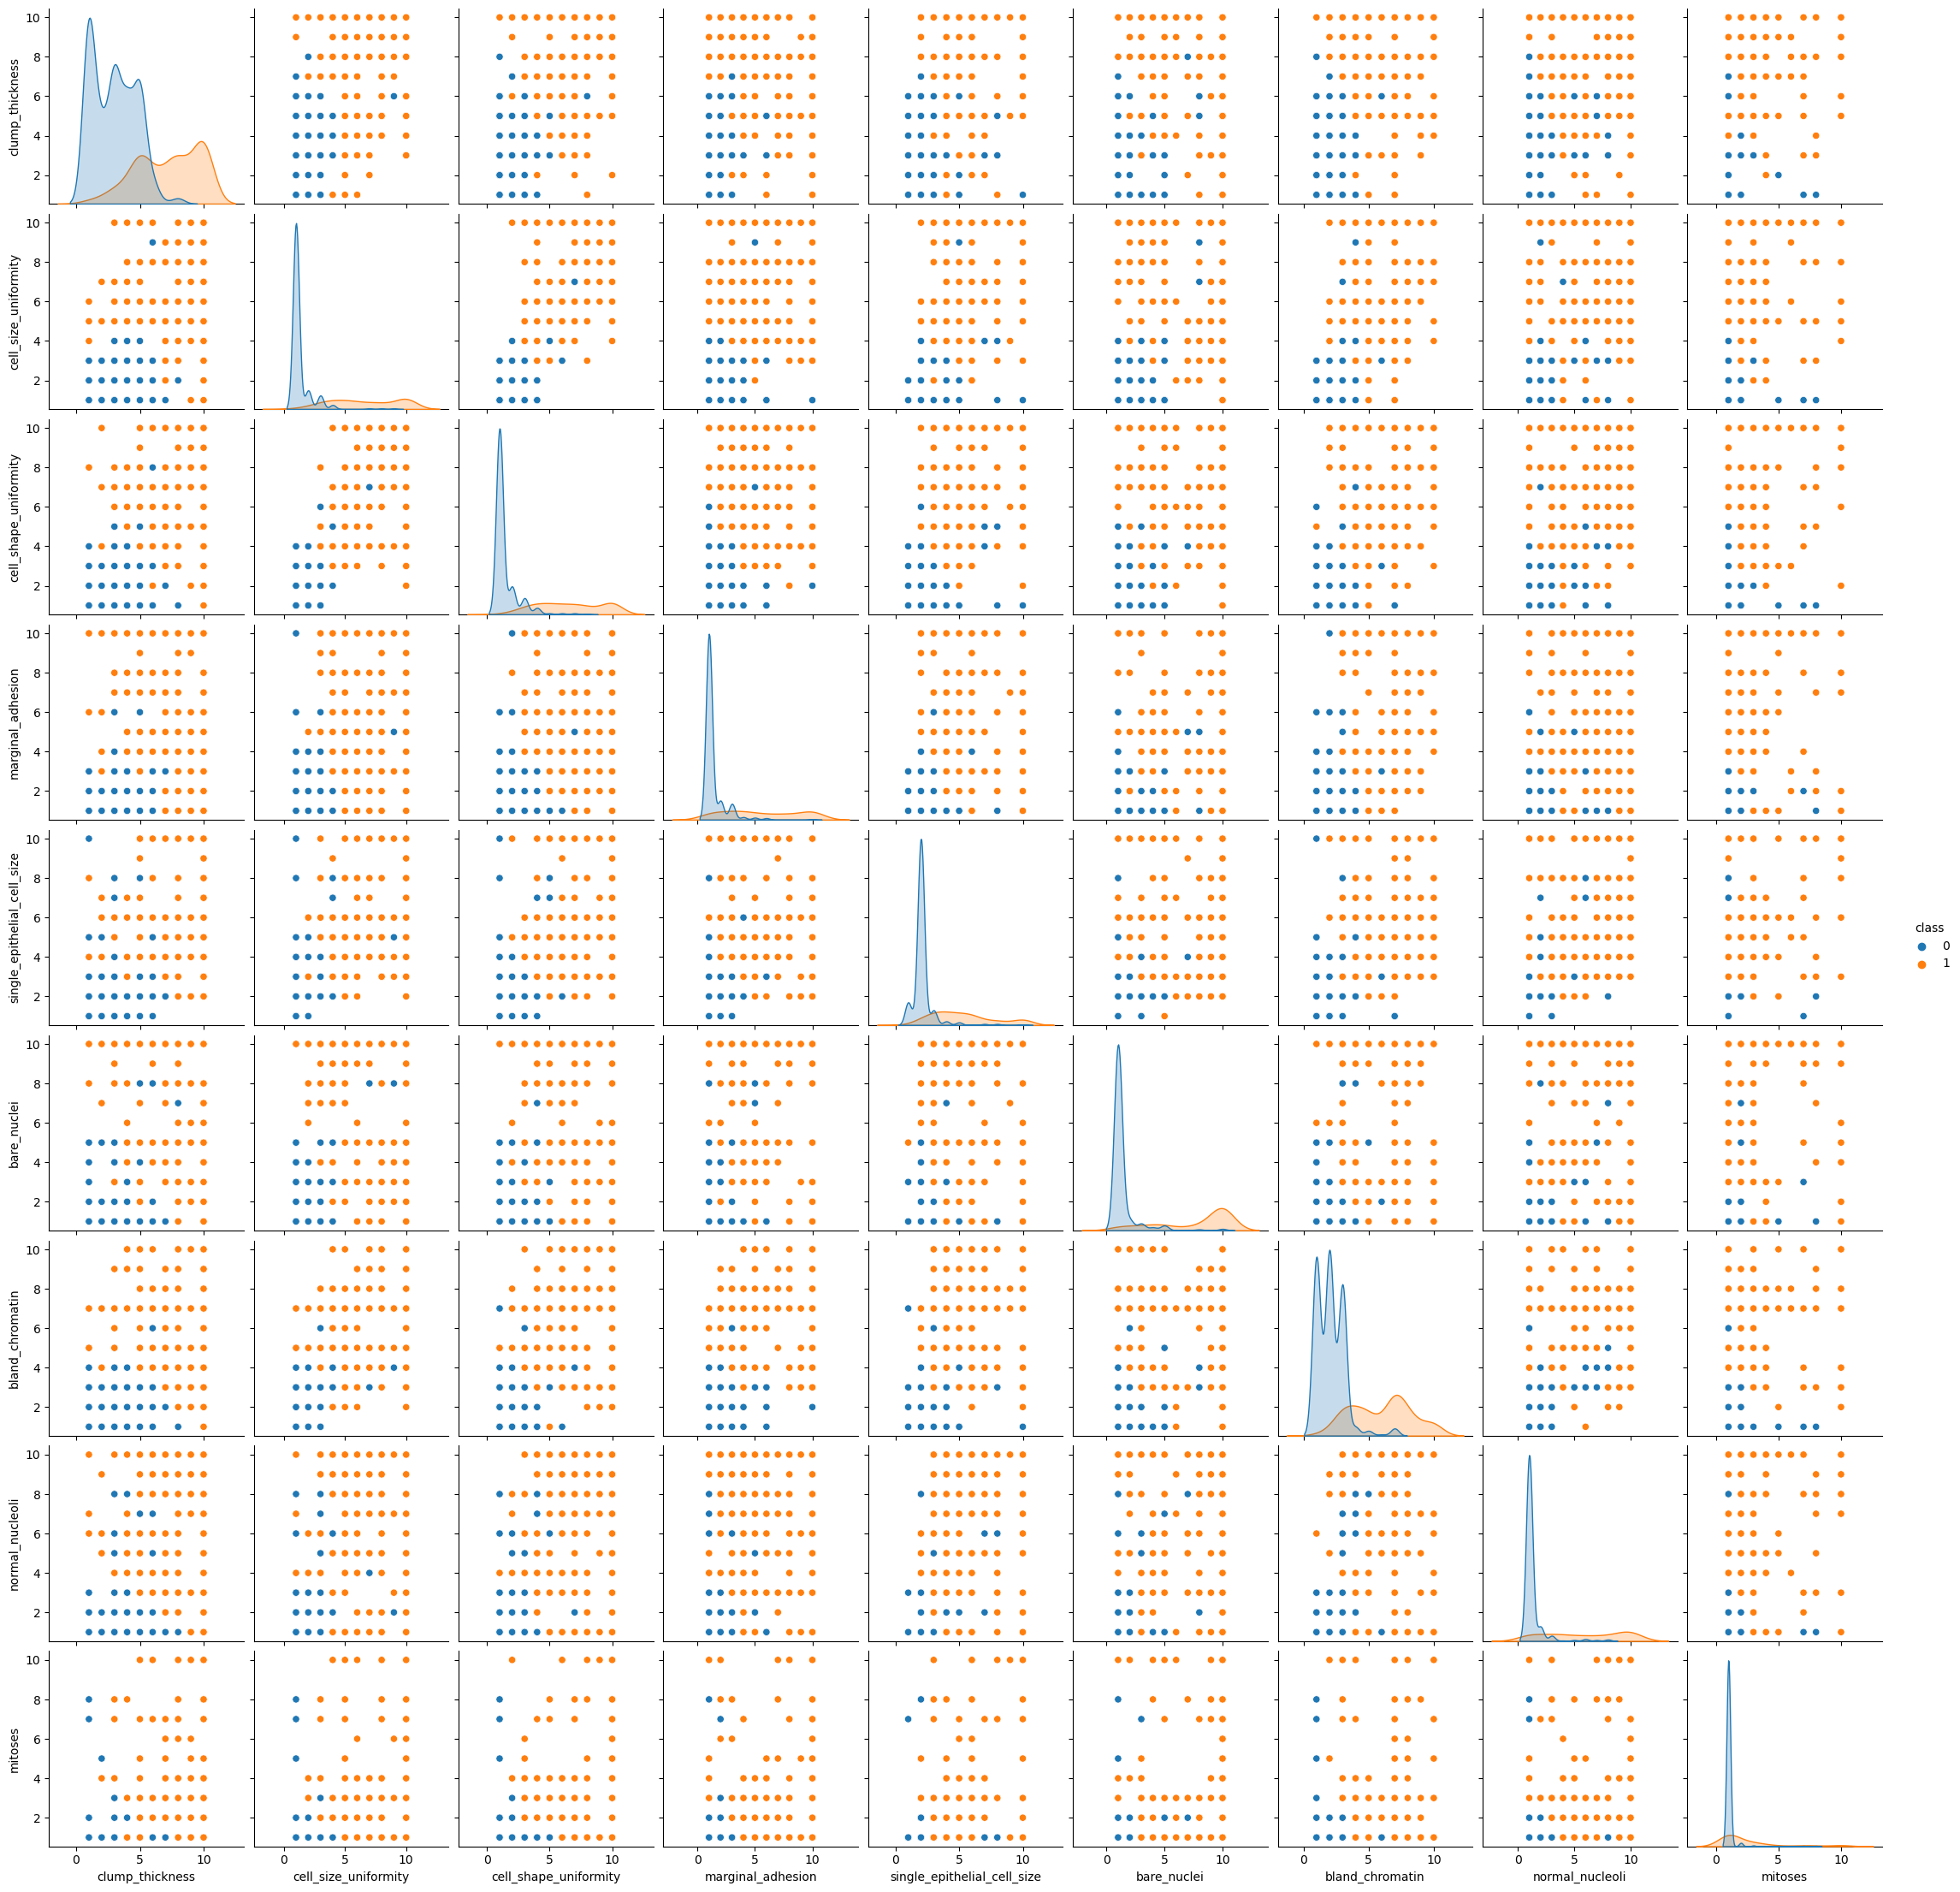

In [9]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='class')
plt.show()

Feature Engineering

In [12]:
# Separate features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Check for missing values in each column
missing_data = data.isnull().sum()

# Print the number of missing values per column
print("Missing values in each column:")
print(missing_data)

# Check for any missing values
if missing_data.any():
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values in the dataset.")


Missing values in each column:
clump_thickness                0
cell_size_uniformity           0
cell_shape_uniformity          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

No missing values in the dataset.
